## Observations and Insights

Observation 1:
The distribution of Ramicane observations is very close to a normal distribution, since the mean and median are very close. The distribution is just slightly left skewed.

Observation 2:
Capomulin and Ramicane have similar distributions for the last recorded volume measurement, in the sense that the ranges from lower bound to upper bound are similar.

Observation 3:
There is a strong positive correlation between average mouse weight (g) and tumor volume (mm3) for the mice in the Capomulin drug regimen (correlation coefficient = 0.84). And the regression analysis shows us that as the weight of a mouse increases by 1 gram, the tumor volume in would increase by 0.95 mm3.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#Print out headers to find column to merge on
#print(mouse_metadata.columns)
#print(study_results.columns)

In [3]:
# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
#mouse_study.head()

## Summary statistics
Including mean, median, variance, standard deviation, and SEM of tumor volumne for each regimen

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary = mouse_study.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

#Print drug summary table
drug_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots
Generate a bar plot that shows the number of data points for each treatment regimen

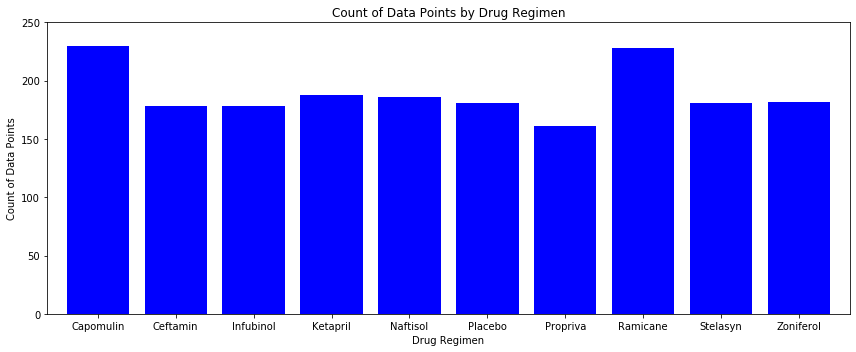

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Generate data frame to create graph from
drug_regimen = mouse_study.groupby("Drug Regimen").agg({"Mouse ID": "count"})

# Creat the bar graph 
# Setting figure size (figsize), bar color (color), y-axis range (ylim), text rotation (rot), and bar width (width)
drug_bar = drug_regimen.plot(kind="bar", figsize=(12,5), color="blue", legend=False, ylim=(0,250), rot=0, width=.8)

# Adding title, and labels to graph
drug_bar.set_title("Count of Data Points by Drug Regimen")
drug_bar.set_xlabel("Drug Regimen")
drug_bar.set_ylabel("Count of Data Points")

# Sizing graph to frame and displaying
plt.tight_layout()
plt.show()

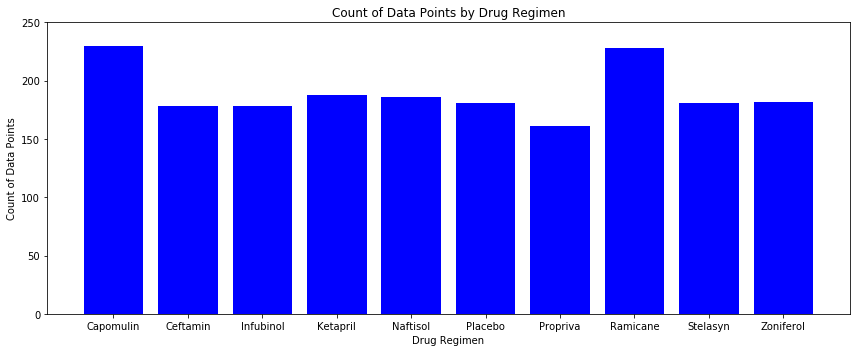

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Generate data frame to create graph from
drug_regimen = mouse_study.groupby("Drug Regimen", as_index=False).agg({"Mouse ID": "count"})

# Setting xvalues for graph
xvalues = drug_regimen["Drug Regimen"]

# Setting figure size
plt.figure(figsize=(12,5))

# Creating graph
# Setting bar color (color) and aligning bars
plt.bar(xvalues, drug_regimen["Mouse ID"], color="blue", align="center")

# Editing the y-axis range
plt.ylim(0,250)

# Adding title, labels to graph
plt.title("Count of Data Points by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Data Points")

# Sizing graph to frame and displaying
plt.tight_layout()
plt.show()

## Pie plots
Generate a pie plot that shows the distribution of female or male mice in the study.

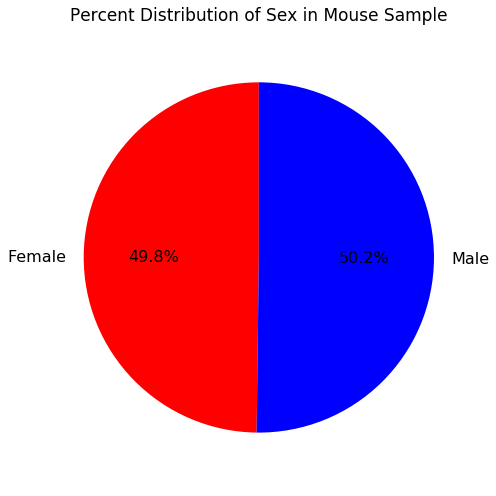

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = mouse_metadata.groupby("Sex").agg({"Mouse ID": "count"})
mouse_gender

# Creating graph
# Setting figure size, labels, colors, font size, no legend, and start angle
sex_pie = mouse_gender.plot(kind="pie", y='Mouse ID', figsize=(7,7), autopct="%1.1f%%", colors=["red", "blue"], fontsize=16, legend=False, startangle=90)

# Adding title and removing y-axis label
sex_pie.set_title("Percent Distribution of Sex in Mouse Sample", fontsize=17)
sex_pie.set_ylabel("")

# Making sure the circle is round, sizing graph to frame, and displaying
plt.axis("equal")
plt.tight_layout()
plt.show()

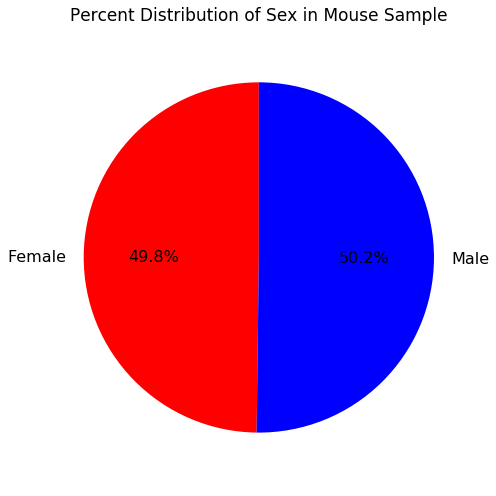

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_metadata.groupby("Sex", as_index=False).agg({"Mouse ID": "count"})

# Creating arrays for categories, values to plot (yvalues), and colors
categories = mouse_gender["Sex"]
yvalues = mouse_gender["Mouse ID"]
colors = ["red", "blue"]

# Setting figure size
plt.figure(figsize=(7,7))

# Creating graph
plt.pie(yvalues, labels=categories, colors=colors, autopct="%1.1f%%", startangle=90, textprops={"fontsize": 16})

# Adding title
plt.title("Percent Distribution of Sex in Mouse Sample", fontsize=17)

# Making sure the circle is round, sizing graph to frame, and displaying
plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots
Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

Then generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Generate data frame with all the mice that used one of 4 drug regimens
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final = mouse_study.loc[mouse_study["Drug Regimen"].isin(regimen)]
final
# Find the final observation record for each mouse
final_tumor_rec = final.groupby("Mouse ID")
final_tumor = pd.DataFrame(final_tumor_rec.nth(-1))
final_tumor

# Creating quartile functions to use in groupby aggregate
def Q25(x):
    return x.quantile(.25)
def Q50(x):
    return x.quantile(.5)
def Q75(x):
    return x.quantile(.75)
def IQR(x):
    iqr = x.quantile(.75) - x.quantile(.25)
    return iqr

# Group by aggregate whild calculating quartiles
drug_qo = final_tumor.groupby("Drug Regimen", as_index=False).agg({"Tumor Volume (mm3)": [Q25, Q50, Q75, IQR]})

# Drop MultiIndex and Rename Columns
drug_qo.columns = drug_qo.columns.droplevel()
drug_qo = drug_qo.rename(columns={
    "": "Drug Regimen",
    "Q25": "Quartile 25",
    "Q50": "Quartile 50",
    "Q75": "Quartile 75",
})

# Calculate Lower and Upper Bounds
drug_qo["Lower Bound"] = drug_qo["Quartile 25"] - 1.5*drug_qo["IQR"]
drug_qo["Upper Bound"] = drug_qo["Quartile 75"] + 1.5*drug_qo["IQR"]

# Finding possible outliers
outlier_check = pd.merge(final_tumor, drug_qo[["Drug Regimen", "Lower Bound", "Upper Bound"]], on="Drug Regimen", how="left")
# Argument to find outliers
outlier_check["Possible Outlier"] = np.where((outlier_check["Tumor Volume (mm3)"] < outlier_check["Lower Bound"])
                                              | (outlier_check["Tumor Volume (mm3)"] > outlier_check["Upper Bound"]), 1, 0)
# Count outliers per drug
outliers = outlier_check.groupby("Drug Regimen", as_index=False).agg({"Possible Outlier": "sum"})

# Print Summary table with quartiles and outliers
qo_summary = pd.merge(drug_qo, outliers, on="Drug Regimen", how="left")
qo_summary

,Drug Regimen,Quartile 25,Quartile 50,Quartile 75,IQR,Lower Bound,Upper Bound,Possible Outlier
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,0
1,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,0
2,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,1
3,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,0


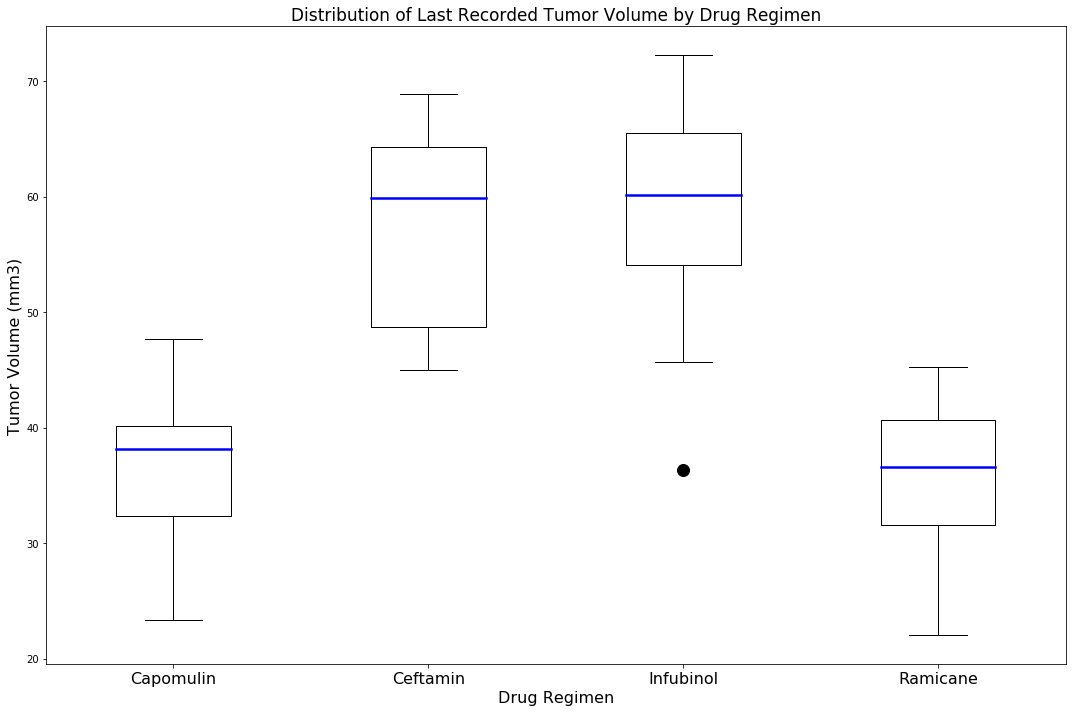

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Creating simple data frame to use and setting index to drug regimen
drug_box = final_tumor[["Drug Regimen", "Tumor Volume (mm3)"]].copy()
drug_box.set_index("Drug Regimen", inplace=True)

# Finding volume numbers for each drug
drug_capomulin = list(drug_box.loc["Capomulin", "Tumor Volume (mm3)"])
drug_ceftamin = list(drug_box.loc["Ceftamin", "Tumor Volume (mm3)"])
drug_infubinol = list(drug_box.loc["Infubinol", "Tumor Volume (mm3)"])
drug_ramicane = list(drug_box.loc["Ramicane", "Tumor Volume (mm3)"])

# Creating variable list to pass to boxplot
drugs = [drug_capomulin, drug_ceftamin, drug_infubinol, drug_ramicane]

# Specifiying outlier dots
flierprops = dict(markerfacecolor='black', marker='o', markersize=12)
# Specifying median line
medianprops = dict(linestyle='-', color="blue", linewidth=2.5)

# Generating figure and creating boxplot
fig, ax = plt.subplots(figsize=(15, 10))
bp = ax.boxplot(drugs, flierprops=flierprops, medianprops=medianprops)


# Adding a title, axis labels, and x tick marks
ax.set_title("Distribution of Last Recorded Tumor Volume by Drug Regimen", fontsize=17)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=16)
ax.set_xlabel("Drug Regimen", fontsize=16)
ax.set_xticklabels(["Capomulin", "Ceftamin", "Infubinol", "Ramicane"], fontsize=16)

# Sizing graph to frame, and displaying
plt.tight_layout()
plt.show()

## Line and scatter plots

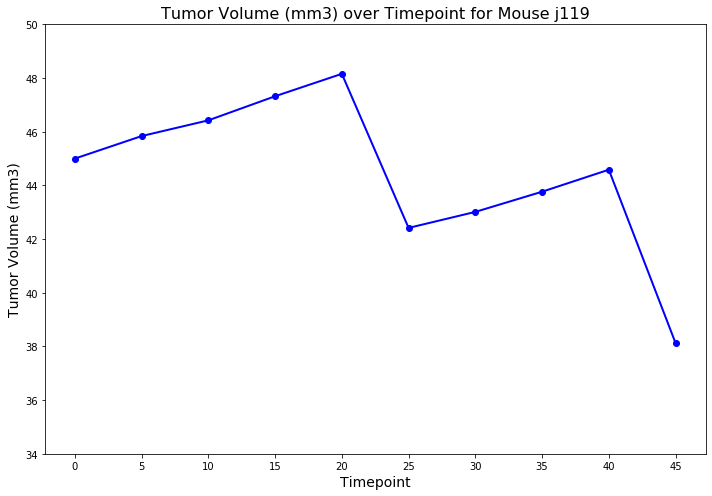

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Finding mice that were treated with Capomulin
capomulin_mice = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]

# Identifying one mouse
mouse1 = "j119"
one_mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"] == mouse1]

# Setting figure size
plt.figure(figsize=(10,7))

# x axis labels/ticks
x_ticks = one_mouse["Timepoint"].unique()

# Creating graph
# Setting dots (marker), color of line/dots (color), and width of line (linewidth)
plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"], marker="o", color="blue", linewidth="2")

# Adding title and labels
plt.title(f"Tumor Volume (mm3) over Timepoint for Mouse {mouse1}", fontsize=16)
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

# Changing y-axis range and setting x-axis tick marks
plt.ylim(34,50)
plt.xticks(ticks=x_ticks)

# Sizing graph to frame and showing
plt.tight_layout()
plt.show()

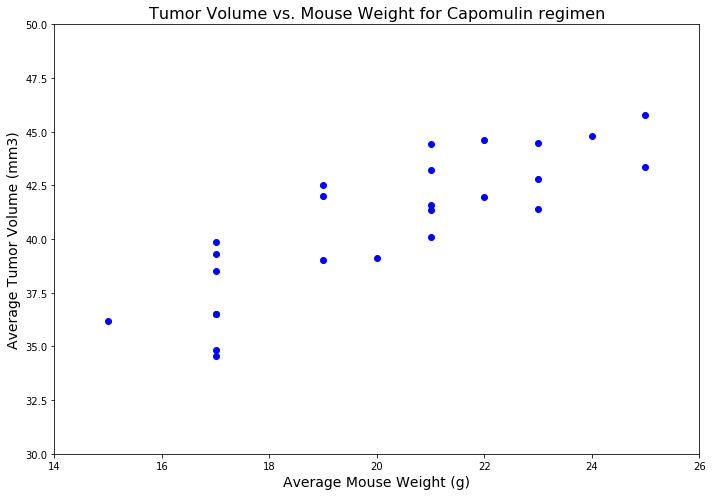

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Instructions clarified - average tumor volume vs average mouse weight
capomulin_mice["Mouse ID"].unique()
mouse_scatter = capomulin_mice.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
})

# Setting figure size
plt.figure(figsize=(10,7))

# Creating graph
# Setting dot color (facecolor), dot border (edgecolor)
plt.scatter(mouse_scatter["Weight (g)"], mouse_scatter["Tumor Volume (mm3)"], facecolor="blue", edgecolor="blue")

# Adding title and labels
plt.title("Tumor Volume vs. Mouse Weight for Capomulin regimen", fontsize=16)
plt.xlabel("Average Mouse Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)

# Changing y-axis range and setting x-axis tick marks
plt.ylim(30,50)
plt.xlim(14,26)

# Sizing graph to frame and showing
plt.tight_layout()
plt.show()

The correlation coefficeint is 0.84


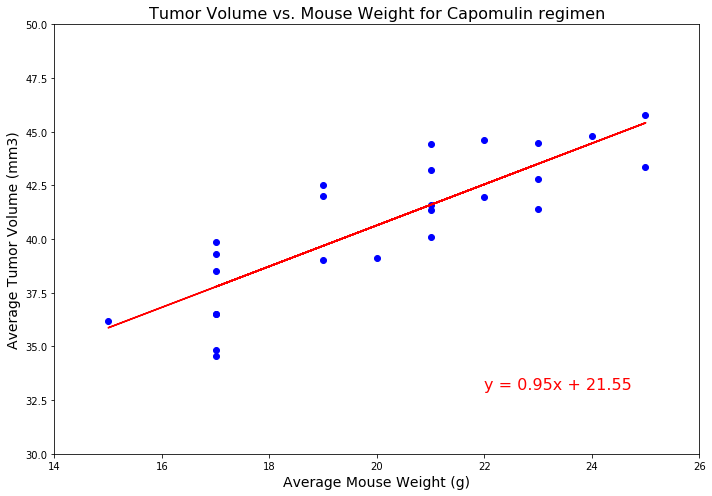

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_scatter["Weight (g)"]
y_values = mouse_scatter["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The correlation coefficeint is {round(rvalue,2)}")

# Create a regression line equation
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot from above with regression line on graph

# Setting figure size
plt.figure(figsize=(10,7))

# Creating graph
# Setting dot color (facecolor), dot border (edgecolor)
plt.scatter(mouse_scatter["Weight (g)"], mouse_scatter["Tumor Volume (mm3)"], facecolor="blue", edgecolor="blue")

# Adding regression line
plt.plot(x_values,regress_values,"r-")

# Adding regression equation to graph
plt.annotate(line_eq, (22,33), fontsize=16, color="red")

# Adding title and labels
plt.title("Tumor Volume vs. Mouse Weight for Capomulin regimen", fontsize=16)
plt.xlabel("Average Mouse Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)

# Changing y-axis range and setting x-axis tick marks
plt.ylim(30,50)
plt.xlim(14,26)

# Sizing graph to frame and showing
plt.tight_layout()
plt.show()
